In [3]:
import pandas as pd

In [4]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from sklearn.model_selection import train_test_split

%matplotlib inline

In [298]:
df = pd.read_csv("./orderInfoAge.csv")

In [299]:
df.head()
df.columns

Index(['Unnamed: 0', 'CustomerID', 'AveMonthSpend', 'BikeBuyer', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1',
       'AddressLine2', 'City', 'StateProvinceName', 'CountryRegionName',
       'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age',
       'Children'],
      dtype='object')

In [300]:
df = pd.concat([df,pd.get_dummies(df['Gender'], prefix='Gender')],axis=1)
df.drop(['Gender'],axis=1, inplace=True)
df.head()
df = pd.concat([df,pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')],axis=1)
df.drop(['MaritalStatus'],axis=1, inplace=True)
df.head()
df = pd.concat([df,pd.get_dummies(df['Occupation'], prefix='Occupation')],axis=1)
df.drop(['Occupation'],axis=1, inplace=True)
df.head()
#df = pd.concat([df,pd.get_dummies(df['Age'], prefix='Age')],axis=1)
#df.drop(['Age'],axis=1, inplace=True)
#df.head()
df = pd.concat([df,pd.get_dummies(df['Education'], prefix='Education')],axis=1)
df.drop(['Education'],axis=1, inplace=True)
df.head()
df = pd.concat([df,pd.get_dummies(df['StateProvinceName'], prefix='StateProvinceName')],axis=1)
df.drop(['StateProvinceName'],axis=1, inplace=True)
df.head()
#df = pd.concat([df,pd.get_dummies(df['BikeBuyer'], prefix='BikeBuyer')],axis=1)
#df.drop(['BikeBuyer'],axis=1, inplace=True)
#df.head()

,Unnamed: 0,CustomerID,AveMonthSpend,BikeBuyer,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,...,StateProvinceName_Tasmania,StateProvinceName_Texas,StateProvinceName_Utah,StateProvinceName_Val d'Oise,StateProvinceName_Val de Marne,StateProvinceName_Victoria,StateProvinceName_Virginia,StateProvinceName_Washington,StateProvinceName_Wyoming,StateProvinceName_Yveline
0,0,11000,89,0,NaN,Jon,V,Yang,NaN,3761 N. 14th St,...,0,0,0,0,0,0,0,0,0,0
1,1,11001,117,1,NaN,Eugene,L,Huang,NaN,2243 W St.,...,0,0,0,0,0,1,0,0,0,0
2,2,11002,123,0,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,...,1,0,0,0,0,0,0,0,0,0
3,3,11003,50,0,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,...,0,0,0,0,0,0,0,0,0,0
4,4,11004,95,1,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,...,0,0,0,0,0,0,0,0,0,0


In [301]:
model = df.select_dtypes(exclude=['object'])
model.drop(['Unnamed: 0'],axis=1, inplace=True)
model.head()

,CustomerID,AveMonthSpend,BikeBuyer,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Gender_F,...,StateProvinceName_Tasmania,StateProvinceName_Texas,StateProvinceName_Utah,StateProvinceName_Val d'Oise,StateProvinceName_Val de Marne,StateProvinceName_Victoria,StateProvinceName_Virginia,StateProvinceName_Washington,StateProvinceName_Wyoming,StateProvinceName_Yveline
0,11000,89,0,1,0,0,2,137947,32,0,...,0,0,0,0,0,0,0,0,0,0
1,11001,117,1,0,1,3,3,101141,33,0,...,0,0,0,0,0,1,0,0,0,0
2,11002,123,0,1,1,3,3,91945,33,0,...,1,0,0,0,0,0,0,0,0,0
3,11003,50,0,0,1,0,0,86688,30,1,...,0,0,0,0,0,0,0,0,0,0
4,11004,95,1,1,4,5,5,92771,30,1,...,0,0,0,0,0,0,0,0,0,0


In [302]:
y = model.pop('BikeBuyer')
x = model

In [303]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.head()
#x_test
#y_train

,CustomerID,AveMonthSpend,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Gender_F,Gender_M,...,StateProvinceName_Tasmania,StateProvinceName_Texas,StateProvinceName_Utah,StateProvinceName_Val d'Oise,StateProvinceName_Val de Marne,StateProvinceName_Victoria,StateProvinceName_Virginia,StateProvinceName_Washington,StateProvinceName_Wyoming,StateProvinceName_Yveline
1864,12973,75,1,1,0,0,78351,31,0,1,...,0,0,0,0,0,0,0,1,0,0
13915,25942,52,0,2,0,0,65860,18,1,0,...,0,0,0,0,0,0,0,0,0,0
8910,20492,54,1,2,0,5,86382,55,1,0,...,0,0,0,0,0,0,0,0,0,0
7015,18470,44,0,2,0,2,95175,44,1,0,...,0,0,0,0,0,1,0,0,0,0
1145,12195,51,1,2,0,3,88894,45,1,0,...,0,0,0,0,0,0,0,0,0,0


(17209, 19)

y = model2.pop('BikeBuyer')
X = model2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
x_train.head()
x_train.shape
#x_test
#y_train

In [304]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)
#x_train

(11530, 74)


In [305]:
dfTest = pd.read_csv("./AW_test.csv")
# Create Age Metrics

currentYear = 1998
def func(row):
    return currentYear - int(row['BirthDate'][0:4])


dfTest['Age'] = df.apply(func, axis=1)
dfTest.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,Bachelors,Management,F,S,0,2,0,5,86931,32
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,33
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,Graduate Degree,Management,F,M,1,2,0,4,103985,33
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,30
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,High School,Manual,F,M,1,1,2,2,21876,30


In [306]:
# Perform onehot on dfTest
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Gender'], prefix='Gender')],axis=1)
dfTest.drop(['Gender'],axis=1, inplace=True)
dfTest.head()
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['MaritalStatus'], prefix='MaritalStatus')],axis=1)
dfTest.drop(['MaritalStatus'],axis=1, inplace=True)
dfTest.head()
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Occupation'], prefix='Occupation')],axis=1)
dfTest.drop(['Occupation'],axis=1, inplace=True)
dfTest.head()
#dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Age'], prefix='Age')],axis=1)
#dfTest.drop(['Age'],axis=1, inplace=True)
#dfTest.head()
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Education'], prefix='Education')],axis=1)
dfTest.drop(['Education'],axis=1, inplace=True)
#dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['StateProvinceName'], prefix='StateProvinceName')],axis=1)
#dfTest.drop(['StateProvinceName'],axis=1, inplace=True)
dfTest.head()
dfTest.shape

(500, 34)

In [319]:
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [320]:
model2 = df.select_dtypes(exclude=['object'])
model2.drop(['CustomerID'],axis=1, inplace=True)
#model2.drop(['NumberCarsOwned'],axis=1, inplace=True)
model2.drop(['AveMonthSpend'],axis=1, inplace=True)
model2.drop(['Unnamed: 0'],axis=1, inplace=True)
#model2.drop(['TotalChildren'],axis=1, inplace=True)
#model2.drop(['NumberChildrenAtHome'],axis=1, inplace=True)
#model2.drop(['Age_over55'],axis=1, inplace=True)
#model2.drop(['Age_under25'],axis=1, inplace=True)
#model2.drop(['Age_25to45'],axis=1, inplace=True)
model2.drop(['MaritalStatus_S'],axis=1, inplace=True)
model2.drop(['Gender_F'],axis=1, inplace=True)
#model2.drop(['YearlyIncome'],axis=1, inplace=True)
#model2.drop(['YearlyIncome'],axis=1, inplace=True)
model2.drop(list(model2.filter(regex = 'Occupation')), axis = 1, inplace = True)
model2.drop(list(model2.filter(regex = 'Education')), axis = 1, inplace = True)
#model2.drop(['Gender_M'],axis=1, inplace=True)
#model2.drop(['BikeBuyer'],axis=1, inplace=True)
model2.head()
model2.shape

(17209, 61)

In [396]:
# Set up our test data for scoring
ztest = dfTest.select_dtypes(exclude=['object'])
ztest.drop(['CustomerID'],axis=1, inplace=True)
#ztest.drop(['NumberCarsOwned'],axis=1, inplace=True)
#ztest.drop(['AveMonthSpend'],axis=1, inplace=True)
#ztest.drop(['Unnamed: 0'],axis=1, inplace=True)
#ztest.drop(['TotalChildren'],axis=1, inplace=True)
#model2.drop(['NumberChildrenAtHome'],axis=1, inplace=True)
#model2.drop(['Age_over55'],axis=1, inplace=True)
#ztest.drop(['Age_under25'],axis=1, inplace=True)
#model2.drop(['Age_25to45'],axis=1, inplace=True)
ztest.drop(['MaritalStatus_S'],axis=1, inplace=True)
ztest.drop(['Gender_F'],axis=1, inplace=True)
#ztest.drop(['YearlyIncome'],axis=1, inplace=True)
#ztest.drop(list(ztest.filter(regex = 'Occupation')), axis = 1, inplace = True)
#ztest.drop(list(ztest.filter(regex = 'Education')), axis = 1, inplace = True)
#model2.drop(['Gender_M'],axis=1, inplace=True)
#model2.drop(['BikeBuyer'],axis=1, inplace=True)

ztest.head()
#ztest.shape

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Gender_M,MaritalStatus_M,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School
0,0,2,0,5,86931,32,0,0,0,1,0,0,0,1,0,0,0,0
1,1,2,2,4,100125,33,1,1,0,0,0,0,1,1,0,0,0,0
2,1,2,0,4,103985,33,0,1,0,1,0,0,0,0,1,0,0,0
3,1,0,0,4,127161,30,1,1,0,0,0,0,1,0,1,0,0,0
4,1,1,2,2,21876,30,0,1,0,0,1,0,0,0,0,1,0,0


In [309]:
y = model2.pop('BikeBuyer')
x = model2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.head()
x_train.shape

(11530, 70)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.head()

In [310]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [227]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [232]:
X.head()

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Gender_M,MaritalStatus_M,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School
1864,1,1,0,0,78351,31,1,0,0,0,0,0,1,0,0,0,1,0
13915,0,2,0,0,65860,18,0,0,0,0,0,0,1,0,0,0,1,0
8910,1,2,0,5,86382,55,0,1,0,1,0,0,0,1,0,0,0,0
7015,0,2,0,2,95175,44,0,0,0,0,0,0,1,0,0,0,1,0
1145,1,2,0,3,88894,45,0,0,0,1,0,0,0,0,1,0,0,0


In [228]:
X = x_train
Y = y_train
grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3 )
grid.fit(X, Y)
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)
#results = pd.DataFrame(grid.cv_results_)
#results.to_csv('xgb-grid-search-results-01.csv', index=False)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   22.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 11.6min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed: 12.4min finished



 All results:
{'mean_fit_time': array([1.72699777, 1.52332973, 1.30466326, 1.64732957, 1.48433073,
       1.30533155, 1.70150304, 1.6833535 , 1.45103073, 2.26001048,
       2.057664  , 1.76266519, 2.13166515, 1.84199746, 1.58999793,
       2.06066497, 1.89366468, 1.68566434, 2.45266366, 2.16099723,
       1.87499634, 2.42299787, 2.14533019, 1.87666368, 2.4159983 ,
       2.16566388, 1.92533056, 1.63933102, 1.47933173, 1.29132922,
       1.64466333, 1.48834014, 1.36956652, 1.68451063, 1.52669732,
       1.33769639, 2.03099807, 1.82566436, 1.62666726, 2.03099513,
       1.82366459, 1.58033061, 2.02266494, 1.85266566, 1.62999916,
       2.48333136, 2.20799629, 1.93433197, 2.46133057, 2.19270531,
       2.0281949 , 2.80143968, 2.29418572, 1.9955012 , 1.80733061,
       1.68133251, 1.55308255, 2.10819554, 1.94312986, 1.57202903,
       1.82704425, 1.68034649, 1.4683311 , 2.21433067, 2.33333143,
       1.83199692, 2.12650156, 2.6568795 , 1.96618223, 2.16633066,
       1.92666554, 1.66666532

In [335]:
params = {
        'min_child_weight': [8],
        'gamma': [5],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'max_depth': [15]
        }

In [336]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=50, objective='binary:logistic',
                    silent=True, nthread=1, parameters=params)

In [337]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=1, objective='binary:logistic',
       parameters={'min_child_weight': [8], 'gamma': [5], 'subsample': [0.8], 'colsample_bytree': [0.8], 'max_depth': [15]},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbosity=1)

In [338]:
from sklearn.metrics import mean_squared_error
preds = xgb.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.479001


In [339]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.27%


In [344]:
xgb.feature_importances_.shape

(70,)

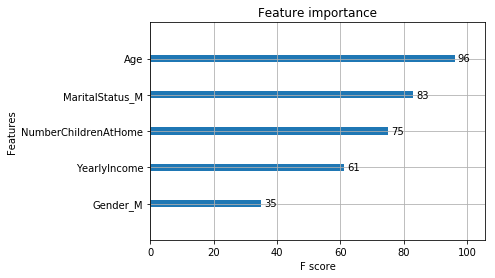

In [342]:
import pyplot
xgb.feature_importances_
# plot feature importance
plot_importance(xgb)
pyplot.show()

In [ ]:
newY = model2.pop('BikeBuyer')
newX = model2


In [353]:
newX.head()
newX = newX[['Age','MaritalStatus_M','NumberChildrenAtHome','YearlyIncome','Gender_M']]
newX.head()
X_train, X_test, Y_train, Y_test = train_test_split(newX, newY, test_size=0.33, random_state=42)
X_train.head()
X_train.shape

(11530, 5)

In [354]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=1, objective='binary:logistic',
       parameters={'min_child_weight': [8], 'gamma': [5], 'subsample': [0.8], 'colsample_bytree': [0.8], 'max_depth': [15]},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbosity=1)

In [355]:
from sklearn.metrics import mean_squared_error
preds = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.479001


In [356]:
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.27%


In [401]:
zResult = ztest[['Age','MaritalStatus_M','NumberChildrenAtHome','YearlyIncome','Gender_M']]
preds = xgb.predict(zResult)
numpy.savetxt("classResult.csv", preds, delimiter=",")

## THIS IS GBM

In [269]:
# Try GBM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [357]:
# Test multiple learning rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 1.1]


for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, Y_test)))

Learning rate:  0.05
Accuracy score (training): 0.787
Accuracy score (validation): 0.779
Learning rate:  0.075
Accuracy score (training): 0.784
Accuracy score (validation): 0.780
Learning rate:  0.1
Accuracy score (training): 0.783
Accuracy score (validation): 0.778
Learning rate:  0.25
Accuracy score (training): 0.796
Accuracy score (validation): 0.794
Learning rate:  0.5
Accuracy score (training): 0.800
Accuracy score (validation): 0.799
Learning rate:  0.75
Accuracy score (training): 0.800
Accuracy score (validation): 0.799
Learning rate:  1
Accuracy score (training): 0.799
Accuracy score (validation): 0.795
Learning rate:  1.1
Accuracy score (training): 0.801
Accuracy score (validation): 0.799


In [393]:
gb_clf2 = GradientBoostingClassifier(n_estimators=30, learning_rate=.5, max_features=5, max_depth=4, random_state=0)
gb_clf2.fit(X_train, Y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report")
print(classification_report(Y_test, predictions))

Confusion Matrix:
[[3387  423]
 [ 713 1156]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3810
           1       0.73      0.62      0.67      1869

   micro avg       0.80      0.80      0.80      5679
   macro avg       0.78      0.75      0.76      5679
weighted avg       0.80      0.80      0.80      5679



In [333]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
gb_clf2.feature_importances_
# plot feature importance
plot_importance(gb_clf2)
pyplot.show()

ValueError: tree must be Booster, XGBModel or dict instance

In [313]:
predictions
import numpy
numpy.savetxt("classResult.csv", predictions, delimiter=",")

PermissionError: [Errno 13] Permission denied: 'classResult.csv'

In [290]:
predictions = gb_clf2.predict(ztest)
import numpy
numpy.savetxt("classResult.csv", predictions, delimiter=",")

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=30, learning_rate=1, max_features=5, max_depth=5, random_state=0)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)